In [1]:
!pip install umap-learn==0.4.6

In [2]:
import sys
sys.path.append("src")

In [2]:
import numpy as np

from src.clustering import Clusterer, pickle
from src.projection import Projector, os

In [5]:
def pipeline(version):
    projector = Projector("TrElections.npz")
    try:
        os.makedirs(f"umap{version}_trials")
    except FileExistsError:
        os.rmdir(f"umap{version}_trials/")
        os.makedirs(f"umap{version}_trials")

    projector.grid_search(
        trials_dir=f"umap{version}_trials",
        min_counts=3, # minimum 3 tweets per user
        min_dists_range = [0.0, 0.1, 0.25, 0.5, 0.75, 0.8, 0.9, 0.99],
        n_neighbors_range=[20, 30, 40, 50, 60, 70, 80, 90, 100]
    )
    f = np.load("TrElections.npz")

    results, hm = Clusterer.cluster_projection_grid_search(
        f"umap{version}_trials", users=f["users"], labels=f["labels"],
        # this means multiple clusters can be assigned the same label
        allow_multiple_clusters=True
    )

In [4]:
pipeline(4)

UMAP: 100%|██████████| 72/72 [33:26<00:00, 27.87s/it]


100%|██████████| 72/72 [00:34<00:00,  2.12it/s]


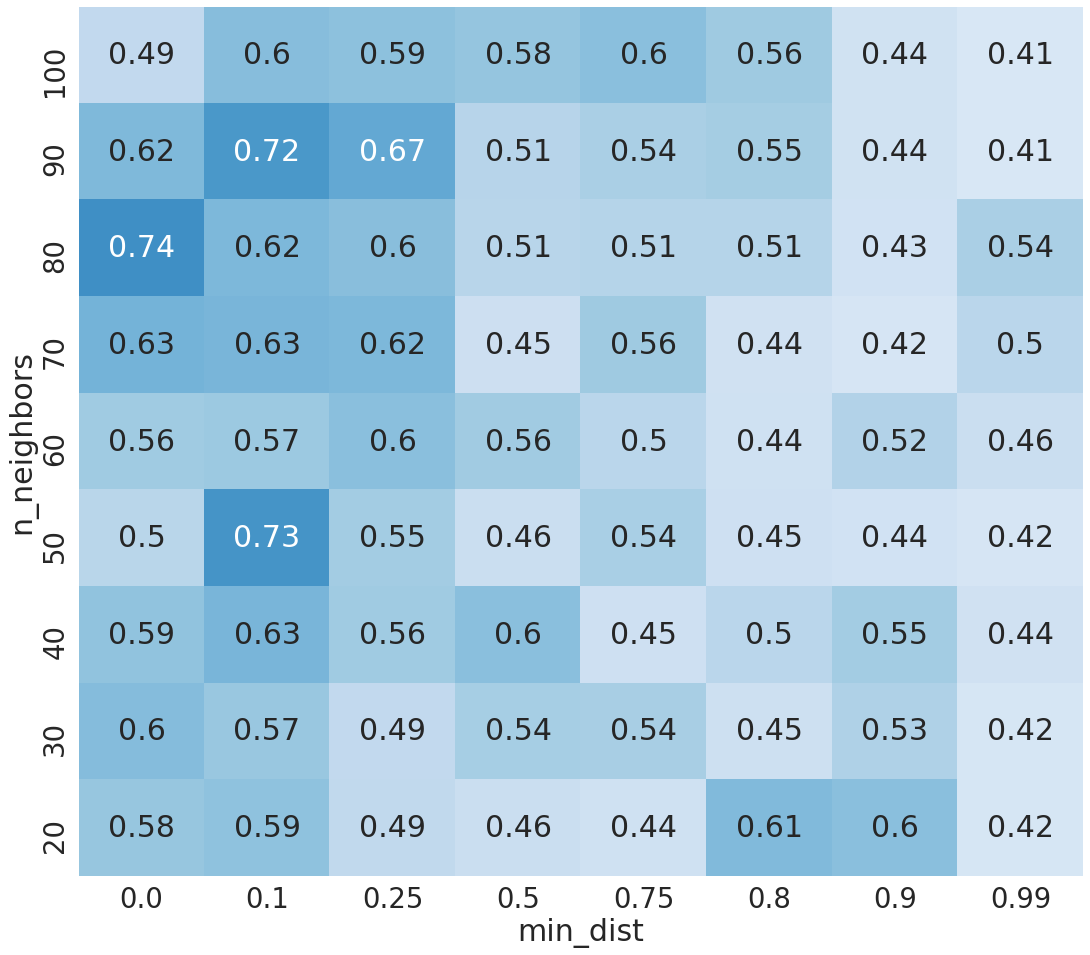

In [4]:
f = np.load("TrElections.npz")

results, hm = Clusterer.cluster_projection_grid_search(
    f"umap4_trials", users=f["users"], labels=f["labels"],
    # this means multiple clusters can be assigned the same label
    allow_multiple_clusters=True
)

### Kernel restarted after umap-learn reinstallation

In [1]:
!pip install umap-learn==0.3.10

     |████████████████████████████████| 40 kB 390 kB/s eta 0:00:01
  Created wheel for umap-learn: filename=umap_learn-0.3.10-py3-none-any.whl size=38881 sha256=4f72382b5deca2b11efb69b7d546ac3c69da7f93e6240f86e42ea88b36d82ffa
  Stored in directory: /home/ammar/.cache/pip/wheels/1b/69/69/91e19c0578b1740a6358f5db2c2dcc5af5b04360c3c9066b26
Successfully built umap-learn
  Attempting uninstall: umap-learn
    Found existing installation: umap-learn 0.4.6
    Uninstalling umap-learn-0.4.6:
      Successfully uninstalled umap-learn-0.4.6


In [2]:
import sys
sys.path.append("src")

In [8]:
import numpy as np

from src.clustering import Clusterer, pickle
from src.projection import Projector, os

In [7]:
pipeline(3)

100%|██████████| 72/72 [00:35<00:00,  2.04it/s]


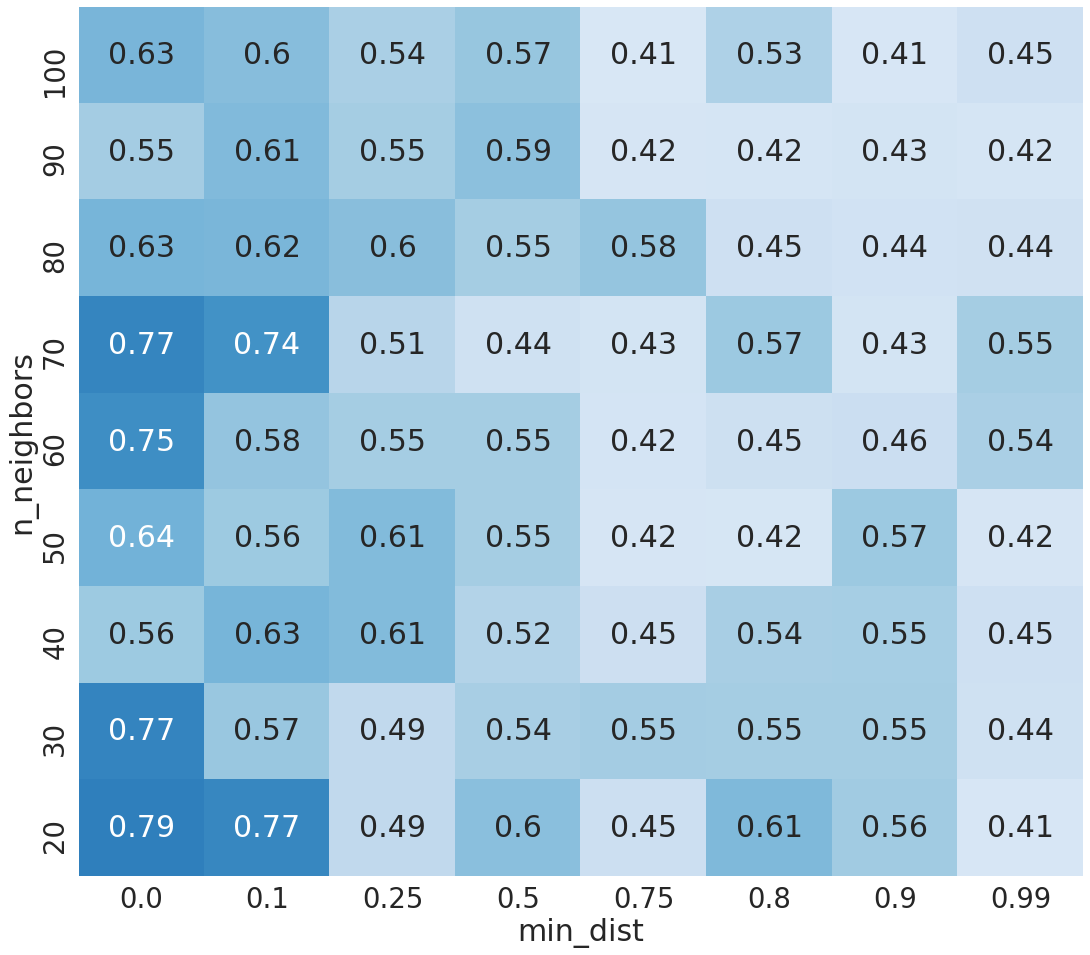

In [9]:
f = np.load("TrElections.npz")

results, hm = Clusterer.cluster_projection_grid_search(
    f"umap3_trials", users=f["users"], labels=f["labels"],
    # this means multiple clusters can be assigned the same label
    allow_multiple_clusters=True
)